# Project 2: Student Success Prediction Models
#### By: Zeynep Turk and Amoreena Ordoñez

Our goal in this project is to train various machine learning models in the hopes of optimizing accuracy of predicting whether a student in higher education will graduate or dropout. These predictions are important as they can inform schools or other early intervention organizations which students are most at risk of dropping out and where to focus helpful resources. It can target educational resources more effectively based on student demographics, course workload, and other factors.

The dataset contains 4,424 student profiles/information with 36 feature variables and 1 predictor variable labeled target. Most of the features involve the student's background and academic history such as on parent education level, enrolled credit units, personal demographics, marital status. There are also three features which note outside factors: the unemployment rate, inflation, and GDP of the student's location.

In [34]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.losses import binary_crossentropy

In [35]:
url = "https://raw.githubusercontent.com/zsturk/Dat402_Proj1/refs/heads/main/data.csv"
df = pd.read_csv(url, sep = ";")

## Data cleaning and exploration

In [36]:
print("Dimensions of the dataframe:",  df.shape)
df.head()

Dimensions of the dataframe: (4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


We can see in this slice of the dataframe that the features have been encoded as numeric. After checking for any NAs, we can see that there were none because the dimension didn't change.

In [37]:
df.dropna()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


When we check the categories in the "Target" column, we can see that there are three categories. For the sake of classification, we can extract the "enrolled category" and train our models to classify for graduate vs dropout.

In [38]:
df.value_counts("Target")

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [39]:
df_enrolled = df[df["Target"] == "Enrolled"]
df = df[df["Target"] != "Enrolled"]
print("Dimensions of dataframe with just enrolled students:", df_enrolled.shape)
print("Dimensions of dataframe without enrolled students:", df.shape)

Dimensions of dataframe with just enrolled students: (794, 37)
Dimensions of dataframe without enrolled students: (3630, 37)


## Exploratory Analysis
Start with checking data for outliers that cause noise and skew model results.

In [40]:
## General sweep for outliers in the data by analyzing each feature's descriptive statistics
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Given that this is a Portuguese university's dataset, the vast majority of the students are from Portugal (encoded as 1), followed by a few other Portuguese-speaking countries such as Brazil (encoded as 41) and Cape Verde (22). Because of this, it is likely this column doesn't have much predictive power and can be dropped. There is a separate binary feature for International students which serves a similar purpose.

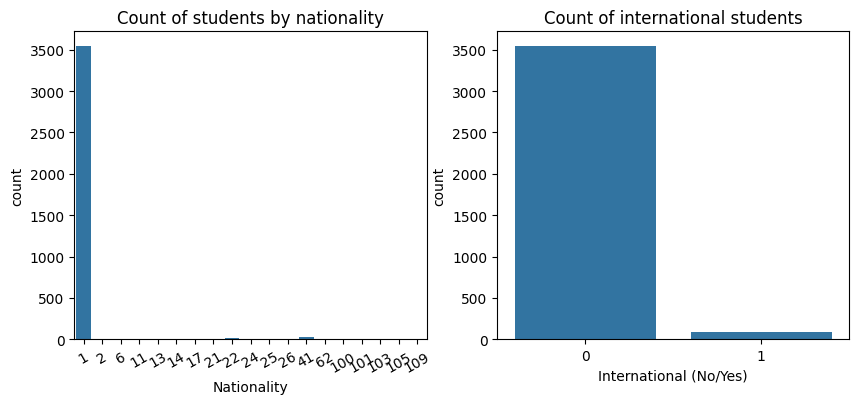

In [41]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.countplot(data = df,
              x = "Nacionality",
              stat = "count"
              )
plt.xticks(rotation = 30)
plt.title("Count of students by nationality")
plt.xlabel("Nationality")
plt.subplot(1,2,2)
sns.countplot(data = df,
              x = "International")
plt.title("Count of international students")
plt.xlabel("International (No/Yes)")
plt.show()

In [42]:
# drop Nacionality and International columns from df
df = df.drop(columns = ["Nacionality", "International"])

# sanity check
print("New dimensions of the dataframe:",df.shape)

New dimensions of the dataframe: (3630, 35)


This dataset also includes 12 features about the curricular units in the first two semesters of study: for units credited, enrolled, approved, and evaluated, etc. What does this look like graphically?

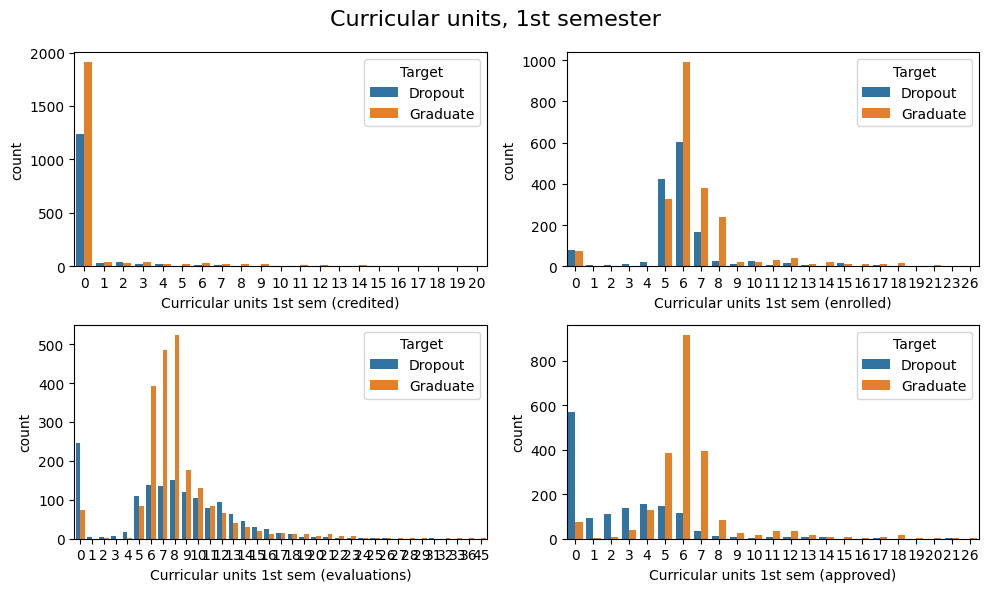

In [43]:
# what are the curricular units like? for 1st semester
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Curricular units, 1st semester", fontsize=16)
sns.countplot(data = df,
              x = "Curricular units 1st sem (credited)",
              hue = "Target",
              ax = ax[0,0])
sns.countplot(data = df,
              x = "Curricular units 1st sem (enrolled)",
              hue = "Target",
              ax = ax[0,1])

sns.countplot(data = df,
              x = "Curricular units 1st sem (evaluations)",
              hue = "Target",
              ax =ax[1,0])

sns.countplot(data = df,
              x = "Curricular units 1st sem (approved)",
              hue = "Target",
              ax = ax[1,1])
plt.tight_layout()
plt.show()

The upper left quadrant stands out because of how many 0 units there are, for both drop-outs and graduates. That seems illogical, not to mention unhelpful for modeling. Does the trend hold for the 2nd semester as well?

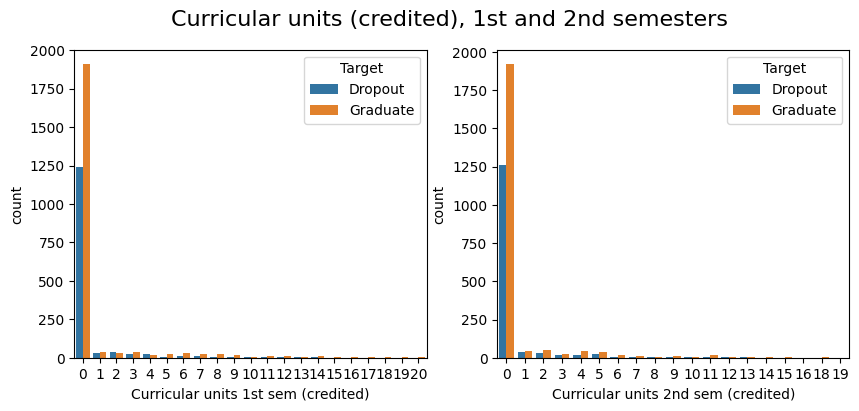

In [44]:
# investigate further what this feature is
plt.figure(figsize = (10,4))
plt.suptitle("Curricular units (credited), 1st and 2nd semesters", fontsize = 16)
plt.subplot(1,2,1)
sns.countplot(data = df,
              x = "Curricular units 1st sem (credited)",
              hue = "Target")
plt.subplot(1,2,2)
sns.countplot(df,
              x = "Curricular units 2nd sem (credited)",
              hue = "Target")
plt.show()

For both semesters, this feature's value is mostly 0. As such, we will drop it from our dataframe.

In [45]:
# drop credited units
df = df.drop(columns = ["Curricular units 1st sem (credited)", "Curricular units 2nd sem (credited)"])

# double check dimension decreased by 2
print("New dimensions of the dataframe:",df.shape)

New dimensions of the dataframe: (3630, 33)


Correlations!

In [46]:
sns.heatmap(df.corr('pearson'))
## uglyyyyy, readable? wtf are those errors

ValueError: could not convert string to float: 'Dropout'

## Predictive Modeling

In [47]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size = 0.2, random_state = 42)

## Unsupervised learning

### PCA
Because high dimensional data, lots of features, curse of dimensionality

In [48]:
## standardize the feature variables
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

## Before we use PCA run decision tree model w/o it

clf = DecisionTreeClassifier(random_state = 13)
clf.fit(X_train_std, y_train)

y_pred1 = clf.predict(X_test_std)

print("Accuracy Score without PCA: {:.5f}".format(accuracy_score(y_test, y_pred1)))

Accuracy Score without PCA: 0.85537


ValueError: x and y must have same first dimension, but have shapes (34,) and (32,)

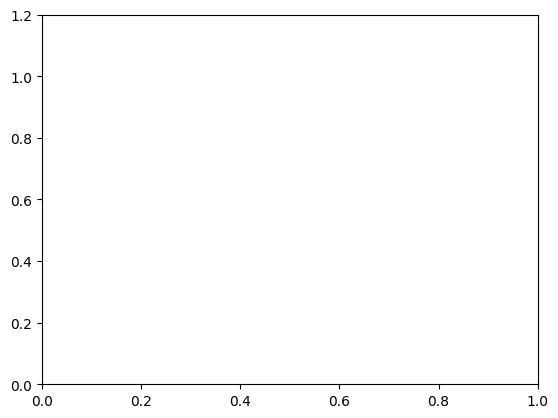

In [49]:
## plot to visualize how much variance is worth capturing in our PCA selection
pca = PCA()
pca.fit(X_train_std)


x = np.arange(1, 35, step = 1) ## number of feature variables
y = np.cumsum(pca.explained_variance_ratio_) ## cumulative value of variance explained by features
plt.ylim(0, 1.2)
plt.plot(x, y, marker='*', linestyle = '-')
plt.xlabel("Number of Features")
plt.ylabel("Percent of Variance Explained by Features")
plt.title("Ideal Percentage of Variance Necessary for PCA")

## plot horixontal line at possible percentage options for tuning PCA
plt.axhline(y = 0.8, color = "magenta", linestyle = "--")
plt.axhline(y = 0.9, color = "orange", linestyle = "--")
plt.axhline(y = 0.95, color = "green", linestyle ="--")

We can see from the horizontal plotted lines that once the percentage of variance passes 90% the amount explained by the remaining features begins to level out. This means the features after the first 20 don't account for a large portion of the variance and so we will consider it noise and set our PCA to create components based on those first 20.

In [ ]:
## create PCA components to explain 80% of variance in data
pca = PCA(.90)
pca.fit(X_train_std)

## how much variance was captured in the three we kept
print("Number of principal components created: ", len(pca.singular_values_))
print("Percent of variance explained by each principal component: ", np.round(pca.explained_variance_ratio_, 4)*100)
print("Singular values of each prinicipal component: ", np.round(pca.singular_values_, 4))


In [ ]:
#Plot first five principal components
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(X_train_std, labels = labels, dimensions = range(5), width = 800,
                        height = 800, color = y_train)
fig.update_traces(diagonal_visible = False)
fig.show()

We set the principal components to be selected to have a combined value of 80% of the explanation of the variance in the data. This created  PC's account for 80% as declared in PCA of variance. Singular values are equal to the 2 norms of the n_ciomponent variables in the lower dimensional space. graphs help visualize how the components interact with each other, important because blah blah blah. ONly looking at half of the chosen components in graphs. Making the model next

In [ ]:
## apply decision tree to transformed PCA data

clf = DecisionTreeClassifier(random_state = 11)
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)

print("Accuracy Score with PCA: {:.5f}".format(accuracy_score(y_test, y_pred)))

findings

### Random Forest

Random forest is a type of model based on ensemble decision trees. It can take both input and output as numeric or categorical. Let's first tune some hyperparameters before fitting the model.

In [ ]:
# optimize parameters with GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20],      #default None
    'min_samples_split': [2, 5, 10],  #default 2
    'min_samples_leaf': [1, 2, 4],    #default 1
   }

grid_search = GridSearchCV(RandomForestClassifier(),
                                 param_grid = param_grid)
grid_search.fit(X_train_std, y_train)


In [ ]:
print("Best hyperparameter values", grid_search.best_params_)

In [ ]:
# instantiate Random Forest classifier
random_forest = RandomForestClassifier(n_estimators = 100,
                                       max_depth = 20,
                                       random_state = 123,
                                       bootstrap = True,
                                       oob_score = True)

While fitting the model, we can also track the out-of-bag accuracy per bootstrap sample.

In [ ]:
# fit and predict the model
random_forest.fit(X_train_std, y_train)
print("Out-of-bag score:", random_forest.oob_score_)
rf_pred = random_forest.predict(X_test_std)

# evaluate the model
print("Accuracy of Random Forest Classifier:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

The accuracy scores for the out-of-bag samples and the testing set are very similar. This could suggest that the model is not overfitting to the training samples as far as accuracy goes. This model also has a higher sensitivity/recall for the graduate category.

Compared to a simple decision tree, Random Forest is not as easy to interpret. But we can check the Gini importance per feature, wherein higher values are more important.

In [ ]:
#feature importance
feature_importance = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({"Features": X_train.columns, "Importance": feature_importance}).sort_values("Importance", ascending = True)

In [ ]:
# graph importances
plt.figure(figsize = (8,8))
plt.barh(y = feature_importance_df["Features"], width = feature_importance_df["Importance"], height = .8)
plt.title("Random Forest Feature Importance", fontsize = 18)
plt.xlabel("Gini importance", fontsize = 12)
plt.show()

Based on the Gini importances of the features, it seems that the most important predictors in this Random Forest model are the number of curricular units the student was approved for in the 1st and 2nd semesters, as well as their grades during that time. This is logical enough.

In [ ]:

#confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(data = cm,
            annot = True,
            xticklabels = ["Dropout", "Graduate"], #or vice versa
            yticklabels = ["Dropout", "Graduate"],
            fmt = "d")
plt.title("Random Forest Model: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Neural Network: Multi-Layer Perceptron
For nueral netwrok we have to recode our string target variable into numeric.

In [ ]:
## recode "Graduate"/"Dropout" with 1/0
encoder = LabelEncoder()
df["Target"] = encoder.fit_transform(df[["Target"]])

##sanity check
df.head()

In [ ]:
## new split with numeric target variable, for fun let's try 85/15
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(df.drop('Target', axis=1), df['Target'], test_size = 0.15, random_state = 71)
X_train_cnn = scaler.fit_transform(X_train_cnn)
X_test_cnn = scaler.fit_transform(X_test_cnn)

In [ ]:
## build the model
cnn = MLPClassifier(max_iter = 1000, solver = 'sgd', alpha = 1e-5,hidden_layer_sizes = (10,2), random_state = 39)
cnn.fit(X_train_cnn, y_train_cnn)

y_pred = cnn.predict(X_test_cnn)

## display classification report to evaluate model accuracy

print("Classification Report: " '\n', classification_report(y_test_cnn, y_pred))



From the classification report above we can see the f1-score for predicting dropouts (value 0) is good at .88 and even better at .92 for predicting graduates. Another helpful metric to look at is the precision and recall scores for each classification of our target variable. With precision at 93% for correctly identified dropout and 89% for correctly identified graduate we seem to have a very well working model! However, it is important to note that the parameters for this model were chosen intuitively and no fine tuning has been to done to determine what inputs would yield the best results. For maximum model accuracy let's use grid search with a handful of different tuning parameter options to see if there may be a better combination of inputs.

In [ ]:
## GridSearchCV for hyperparamter tuning
## mask convergence warnings
warnings.filterwarnings('ignore')
mlpc = MLPClassifier(max_iter = 1000)
param_space = {'hidden_layer_sizes': [(100,), (50,50,50)], 'activation': ['relu', 'identity'],
                   'solver': ['sgd', 'adam'], 'alpha': [0.0001, 1e-5]}
search = GridSearchCV(mlpc, param_space, n_jobs = 1, cv = 3)
search.fit(X_train_cnn, y_train_cnn)


Our search has found that best inputs for our model are the ones we have already chosen. With maximum number of iterations limited at 1,000, a weight optimization of stochastich gradient descent, and the strength of the L2 regularization term set to 0.00001. Now that we can be certain we have the best performing model we can make let's plot the model's loss curve to help visualize.

In [ ]:
## Multi-Layer Perceptron loss curve
loss = cnn.loss_curve_

sns.lineplot(cnn.loss_curve_)
plt.title("Amount of Loss by Epoch in Multi-Layer Perceptron")
plt.xlabel("Epoch (max_iter in scikit)")
plt.ylabel("Loss")

## Conclusion
* Random forest best model, quite close to neural net.
* Outliers in data that are stopping accuracy of models from going beyond?
* Models are better at predicting graduates than predicting for dropouts - we would ideally like to identify dropouts first, however.


References:

Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2022). Predicting Student Dropout and Academic Success. Data, 7(11), 146. https://doi.org/10.3390/data7110146